# Metrics for model evaluation

Very often, we need to somehow evaluate existing machine learning models. In this document, we will quickly describe the most common metrics used for model evaluation. 

## Regression metrics

When solving a regression task, the goal is to find a model that correctly models a relationship between attributes $x_1, \dots, x_n$ a dependent variable $y \in \mathbb{R}$. We assume that this relationship is given by an unknown function $f(x_1, \dots, x_n)$. Depending on the type of the model, we can have additional assumptions about the function (e.g. in linear regression, the function is a linear combination of the variables $x_1, \dots, x_n$).

### Mean squared error (MSE)

The most common regression metric is the mean squared error $$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2,$$ where $n$ is the number of instances in the test set, $x_i$ are the instances and $\hat{f}(x_i)$ is the estimate of the function given by the model.

Let's try to generate some data and compare the MSE of different models. We will also demonstrate so called overfitting on these data.

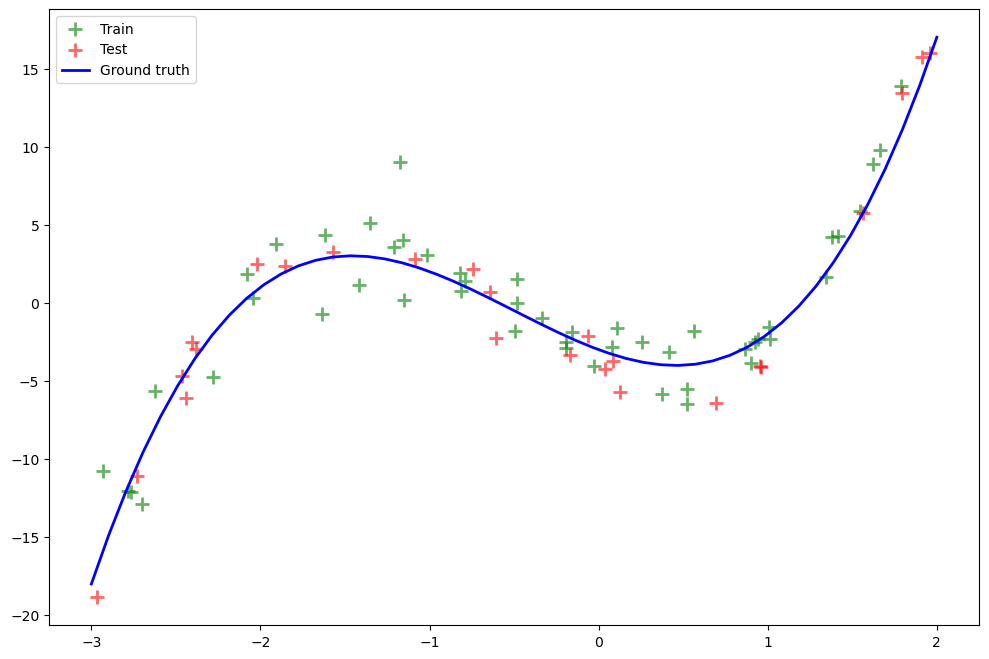

In [1]:
import numpy as np

np.random.seed(1234)

# define a simple function
def fce(x):
    return 2*x*x*x+3*x*x-4*x-3

x = np.random.random(75)*5-3
y = fce(x) + 2*np.random.randn(75)

# first 50 samples are in train set, the rest is test set
train_x, train_y = x[:50], y[:50]
test_x, test_y = x[50:], y[50:]
%matplotlib inline
import matplotlib.pyplot as plt

# plot the train set, test set, and function without noise 
plt.figure(figsize=(12,8))
plt.scatter(train_x, train_y, c='green', marker='+', s=100, alpha=0.6, linewidths=2, label='Train')
plt.scatter(test_x, test_y, c='red', marker='+', s=100, alpha=0.6, linewidths=2, label='Test')

lin_x = np.linspace(-3, 2)
lin_y = fce(lin_x)

plt.plot(lin_x, lin_y, c='blue', linewidth=2, label='Ground truth')
plt.legend()
plt.show()

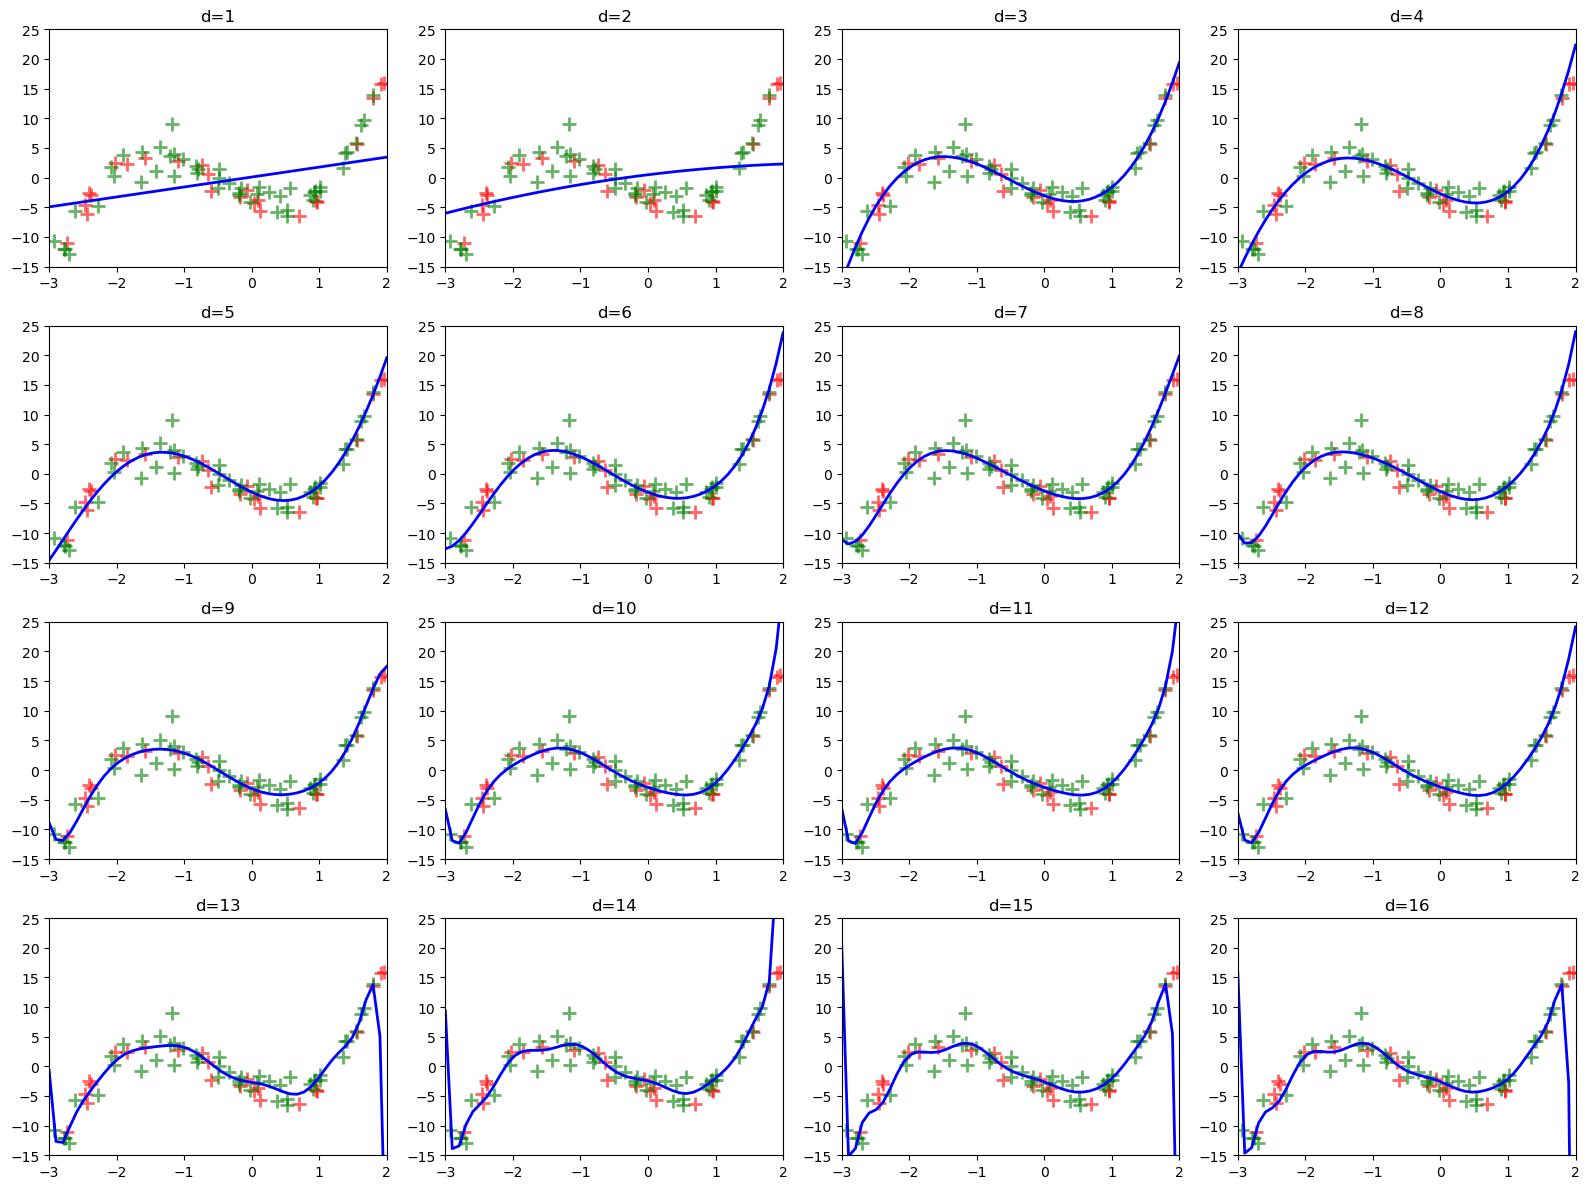

In [2]:
mse_tr = []
mse_te = []


# try fitting different degrees polynomials to the data and plot the resulting models
plt.figure(figsize=(16,12))
for i in range(1,17):
    plt.subplot(4,4,i)
    p1 = np.poly1d(np.polyfit(train_x, train_y, i))
    residuals_tr = p1(train_x)-train_y
    residuals_te = p1(test_x)-test_y
    mse_tr.append(1/len(residuals_tr)*np.dot(residuals_tr, residuals_tr))
    mse_te.append(1/len(residuals_te)*np.dot(residuals_te, residuals_te))
    plt.scatter(test_x, test_y, c='red', marker='+', s=100, alpha=0.6, linewidths=2, label='Data')
    plt.scatter(train_x, train_y, c='green', marker='+', s=100, alpha=0.6, linewidths=2, label='Data')
    plt.plot(lin_x, p1(lin_x), c='blue', linewidth=2, label=('d=%d'%i))
    plt.title('d=%d'%i)
    plt.ylim([-15, 25])
    plt.xlim([-3,2])

plt.tight_layout()
plt.show()

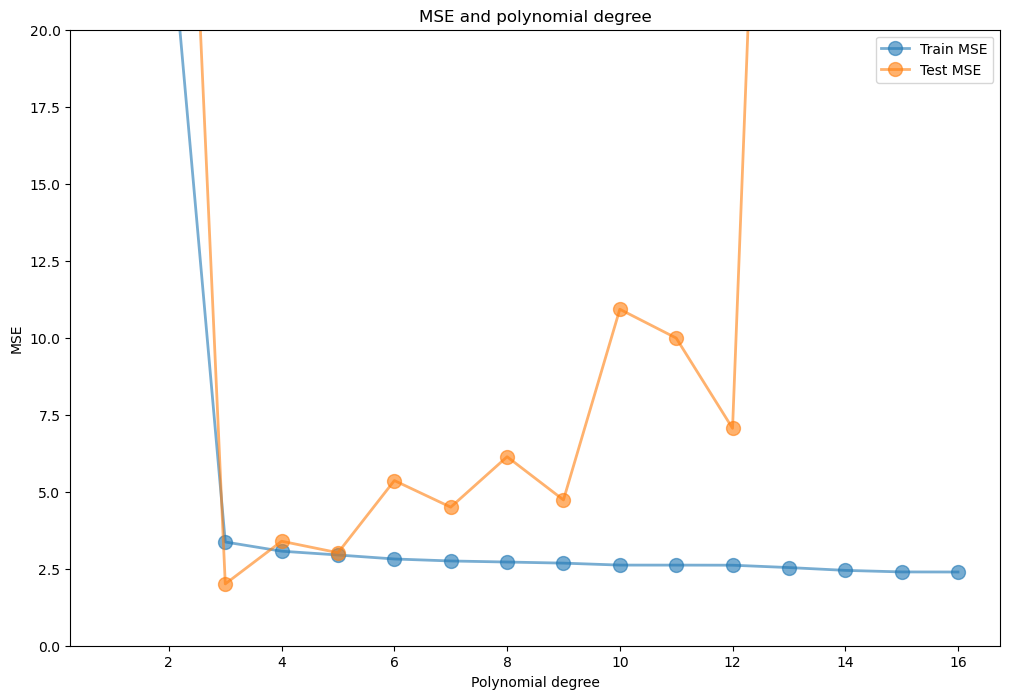

In [3]:
# plot the train and test MSE
plt.figure(figsize=(12,8))
plt.plot(range(1,17), mse_tr, linewidth=2, marker='o', markersize=10, alpha=0.6, label='Train MSE')
plt.plot(range(1,17), mse_te, linewidth=2, marker='o', markersize=10, alpha=0.6, label='Test MSE')
plt.ylim([0,20])
plt.legend()
plt.title('MSE and polynomial degree')
plt.ylabel('MSE')
plt.xlabel('Polynomial degree')
plt.show()

In addition to the MSE, we have other similar regression metrics, such as mean absolute error or median absolute error. It differs from the MSE by using the absolute value instead of the square (and in case of median median error, also by using the median instead of the mean).

### Coefficient of determination ($R^2$ score)

In statistics, $R^2$ score is often used. It expresses the ratio of the variance in the data explained by the model - $$R^2 = 1 - \frac{MSE}{var(y)}$$

## Classification metrics

In classification a much wider range of metrics is used. Some of the more common ones are mentioned in this section..

### Accuracy

The simplest metric is accuracy, which simply calculates how many percent of patterns have been correctly classified. However, its simplicity that makes it often misleading. For example, if we have a data set where 98% of instances belong to one class and the rest belongs to another, any accuracy less than 98% is wrong (i.e. worse than the classifier that always predicts the most common class).

### Precision and recall

Precision (P) and recall (R) partly solve the problem with accuracy. Precision expresses how many percent of the samples that are assigned to a given class really belong to it. Recall, on the other hand, says how many percent of the samples that belong to a given class the classifier has marked as belonging to it.

### F-score

F-score combines precision and recall to a single number that often evaluates the classifier better than any of the metrics above. It is computed as the harmonic average of precision and recall $$F=\frac{2PR}{P+R}.$$

Let's again try to generate a simple example of classification and see how one of the simplest classifiers - kNN (to the nearest neighbors) behaves. We deliberately find such a seed and set such standard deviations that the two clusters overlap (otherwise the task is really simple).

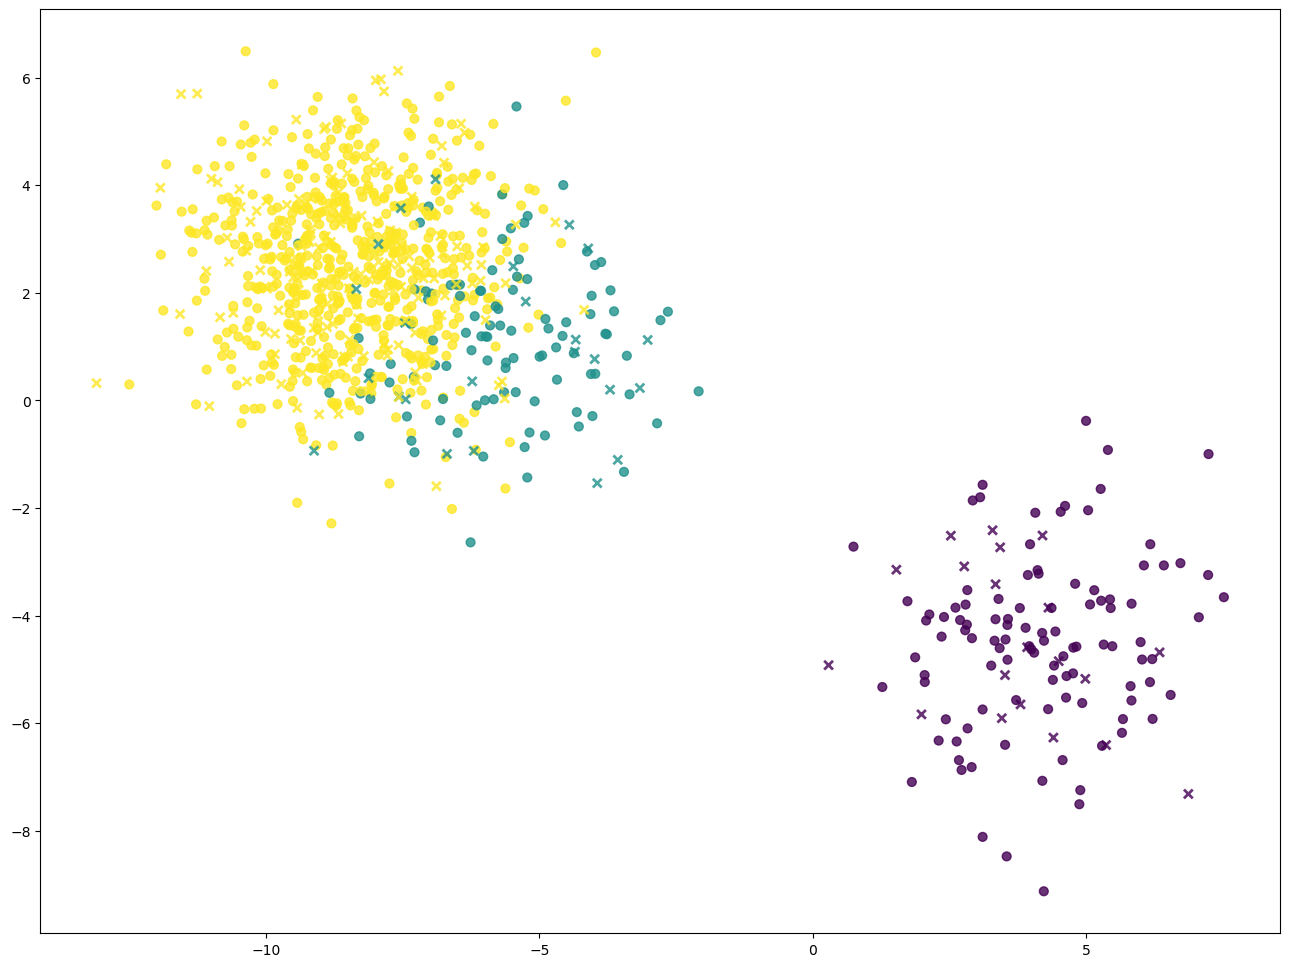

In [4]:
from sklearn import datasets

# generate the train set
X1, y1 = datasets.make_blobs(n_samples=250, n_features=2, centers=2, cluster_std=1.5, random_state=123)
X2, y2 = datasets.make_blobs(n_samples=750, n_features=2, centers=1, cluster_std=1.5, random_state=7)

# move the large blob to overlap with the small ones (works only for the selected seeds)
X2 = X2-[0,3]

# set the target class for the large blob to 2 (the small ones are 0 and 1)
y2 = y2+2

# merge the two sets of blobs
X = np.vstack([X1, X2])
y = np.append(y1, y2)

# create train/test split
shuffle=np.random.permutation(len(y))

X = X[shuffle]
y = y[shuffle]

train_x, test_x = X[:800], X[800:]
train_y, test_y = y[:800], y[800:]

# plot the data
plt.figure(figsize=(16, 12))
plt.scatter(train_x[:,0], train_x[:,1], c=train_y, marker='o', s=40, alpha=0.8)
plt.scatter(test_x[:,0], test_x[:,1], c=test_y, marker='x', s=40, linewidths=2, alpha=0.8)
plt.show()

Let's see how a simple classifier works.

Accuracy: 0.90

Confusion matrix:
[[ 20   0   0]
 [  0  13  11]
 [  0  10 146]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.57      0.54      0.55        24
           2       0.93      0.94      0.93       156

    accuracy                           0.90       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.89      0.90      0.89       200



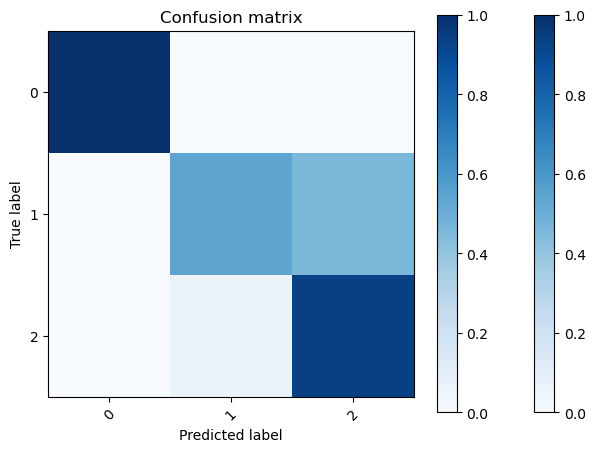

In [6]:
from sklearn import neighbors
from sklearn import metrics

# train a simple kNN classifier
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train_x, train_y)

clf_y = clf.predict(test_x)

# compute the metrics for the classifier
print('Accuracy: %.2f' % metrics.accuracy_score(test_y, clf_y))

print()
print('Confusion matrix:')
print(metrics.confusion_matrix(test_y, clf_y, ))

print()
print('Classification report:')
print(metrics.classification_report(test_y, clf_y))

# confusion matrix can also be visualized
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [0,1,2]
    plt.xticks(tick_marks, [0,1,2], rotation=45)
    plt.yticks(tick_marks, [0,1,2])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cm = metrics.confusion_matrix(test_y, clf_y)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # "numpy magic" to normalize rows of the confusion matrix (makes the visualization better)
    
plot_confusion_matrix(cm_normalized)

Let's see how the decision boundary of the models changes based on the number of neighbors.

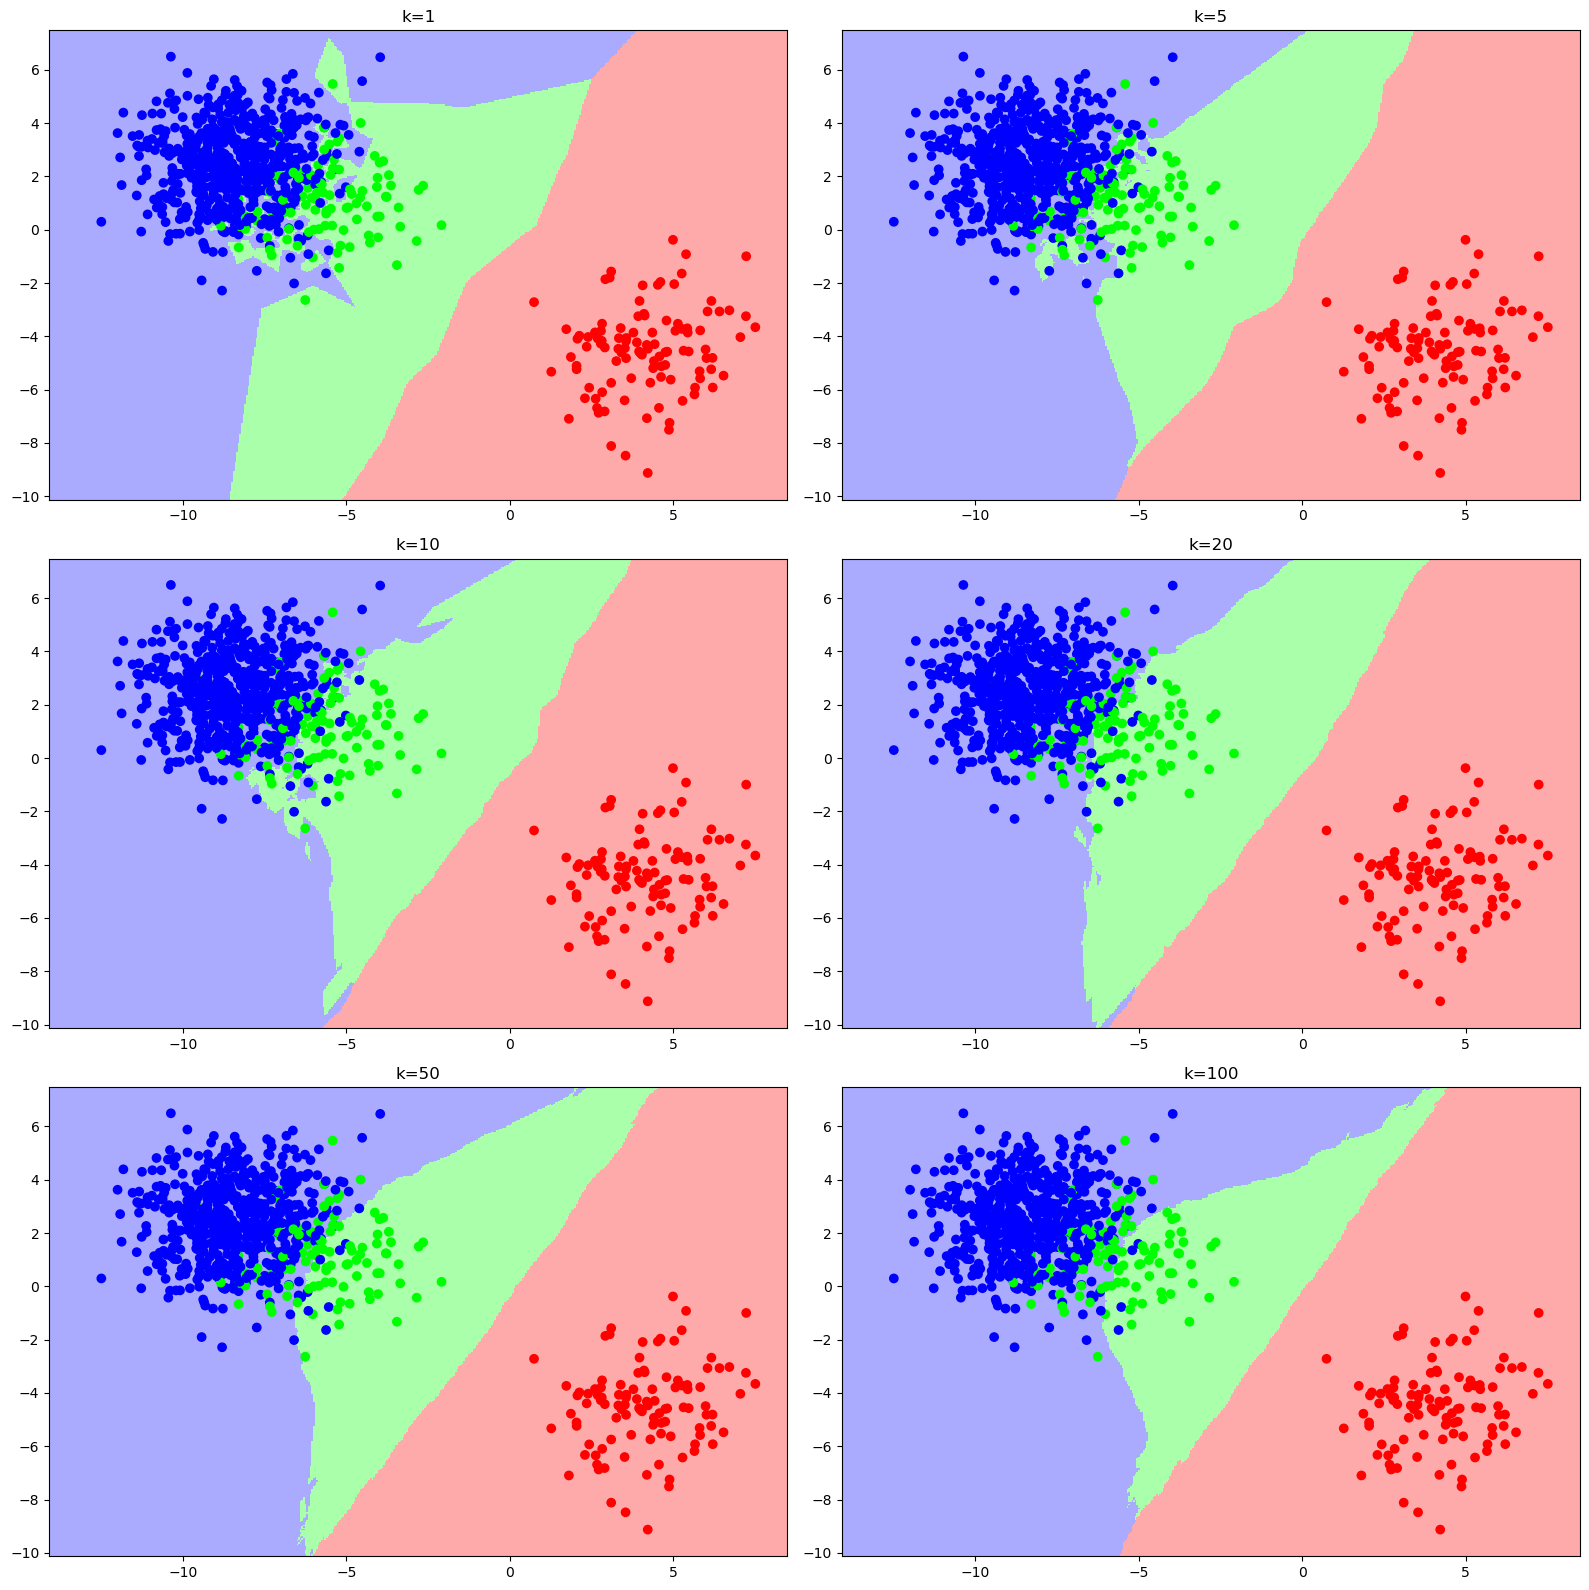

In [9]:
from matplotlib import colors

# select better colors
cmap_light = colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = colors.ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# plot the decision boundary 
# (inspired by http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)
plt.figure(figsize=(16,16))
for j, i in zip(range(1,7),[1, 5, 10, 20, 50, 100]):
    plt.subplot(3, 2, j)
    
    clf = neighbors.KNeighborsClassifier(i)
    clf.fit(train_x, train_y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("k=%d" % i)

plt.tight_layout()
plt.show()

### $\kappa$ statistic

A very interesting metric can be used when the goal is to predict some rating (e.g. of movies). The $\kappa$ statistic evaluates how two different raters correlates. It also has a weighted variant, where larger differences are weighted more. The computation of the $\kappa$ statistic is a bit complicated, but you can check the formula on Wikipedia (https://en.wikipedia.org/wiki/Cohen%27s_kappa). It is also implemented in the `scikit-learn` library (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html).

### Logloss (cross-entropy)

Sometimes, instead of predicting a given class, we want probabilities that a given instance belongs to a given class. In that case, we can use the cross-entropy:
$$log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})$$
